In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mutual_info_score
from sklearn.feature_selection import mutual_info_regression

In [3]:
data = pd.read_csv('data.csv', delimiter=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,16,U,LE3,T,4,3,teacher,services,...,5,4,3,1,2,1,2,16,15,15
1,GP,M,18,U,LE3,T,1,1,other,other,...,2,3,5,2,5,4,0,6,5,0
2,GP,M,17,R,LE3,A,4,4,teacher,other,...,3,3,3,2,3,4,2,10,11,12
3,GP,F,15,U,LE3,T,3,2,services,other,...,4,4,4,1,1,5,10,7,6,6
4,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14


In [5]:
# check for duplicates and nulls 
print(data.isna().any().sum()) # 0 null values 
data.drop_duplicates()

0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,16,U,LE3,T,4,3,teacher,services,...,5,4,3,1,2,1,2,16,15,15
1,GP,M,18,U,LE3,T,1,1,other,other,...,2,3,5,2,5,4,0,6,5,0
2,GP,M,17,R,LE3,A,4,4,teacher,other,...,3,3,3,2,3,4,2,10,11,12
3,GP,F,15,U,LE3,T,3,2,services,other,...,4,4,4,1,1,5,10,7,6,6
4,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,GP,M,15,U,LE3,A,2,1,services,other,...,4,5,5,2,5,5,0,8,9,10
312,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
313,GP,F,15,U,GT3,T,4,4,teacher,teacher,...,4,3,2,1,1,5,0,16,16,15
314,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0


In [6]:
#separate columns into numeric and nominal
data.dtypes
cat = data.select_dtypes(include ="object")
num = data.select_dtypes('int')


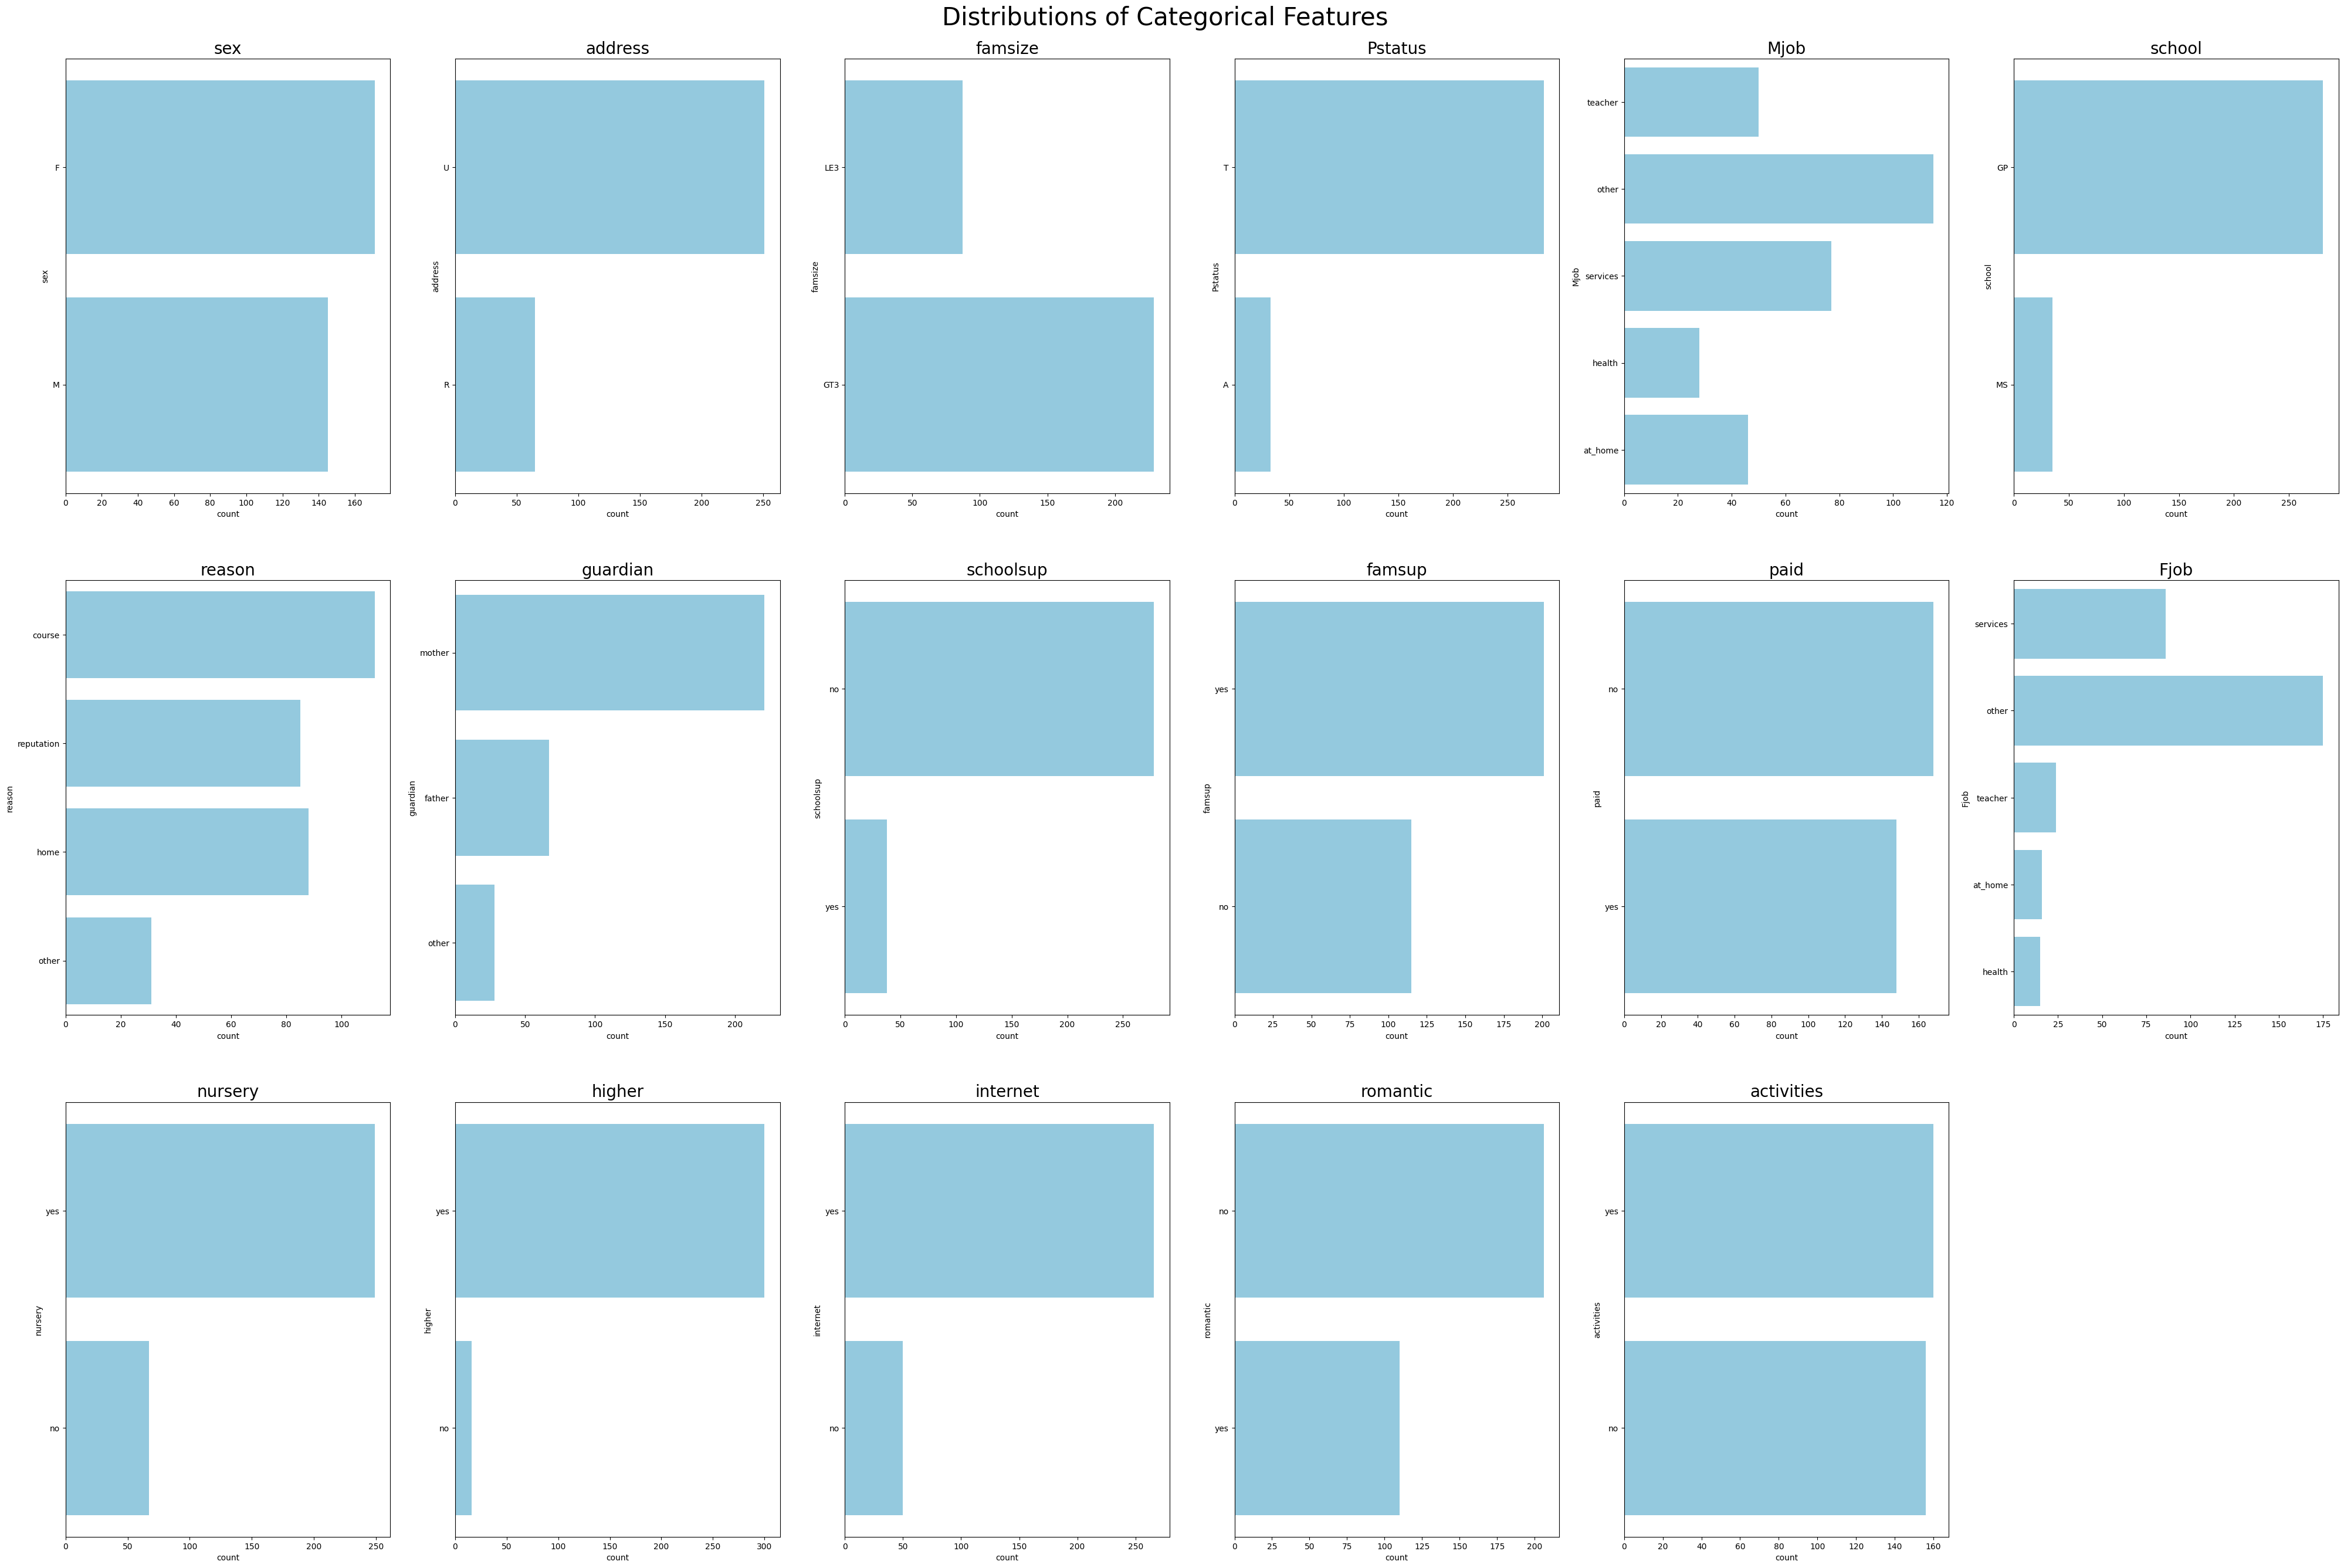

In [12]:
#plot  distributions of categorical data
fig, ax = plt.subplots(3,6, figsize = (50,30))
for i in range(17):
    if i < 6:
        row = 0
    elif i > 11:
        row = 2
    else: row = 1
    col = i % 6 - 1
    sns.countplot(cat[cat.columns[i]], ax= ax[row,col], color = 'skyblue')
    ax[row,col].set_title(cat.columns[i], fontsize = 20)
sns.countplot(cat['activities'], ax= ax[2,4], color = 'skyblue')
ax[2,4].set_title('activities', fontsize = 20)
ax[2,5].remove()
plt.suptitle("Distributions of Categorical Features", fontsize = 30)
plt.subplots_adjust(top = .95)
plt.savefig("figures/cat_features_hist.png", bbox_inches = 'tight')

,famrel,freetime,goout,Dalc,Walc,health
0,5,4,3,1,2,1
1,2,3,5,2,5,4
2,3,3,3,2,3,4
3,4,4,4,1,1,5
4,5,3,3,1,1,3
...,...,...,...,...,...,...
311,4,5,5,2,5,5
312,4,1,4,1,1,1
313,4,3,2,1,1,5
314,5,4,2,1,2,5


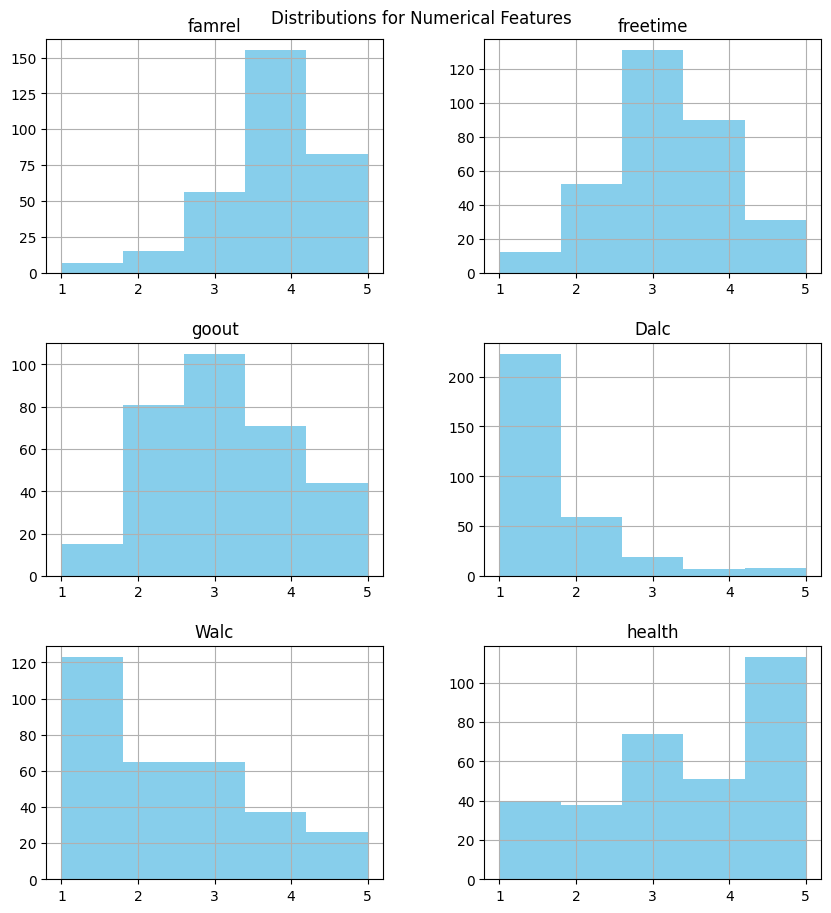

In [28]:
#distributions of numerical features on scale of 1-5
num[num.columns[6:-4]].hist(color = 'skyblue', bins = 5, figsize = (10,10))
plt.xticks(range(1,6))
plt.suptitle("Distributions for Numerical Features")
plt.subplots_adjust(top = 0.95)
plt.savefig('figures/num_5_hist.png', bbox_inches = 'tight')

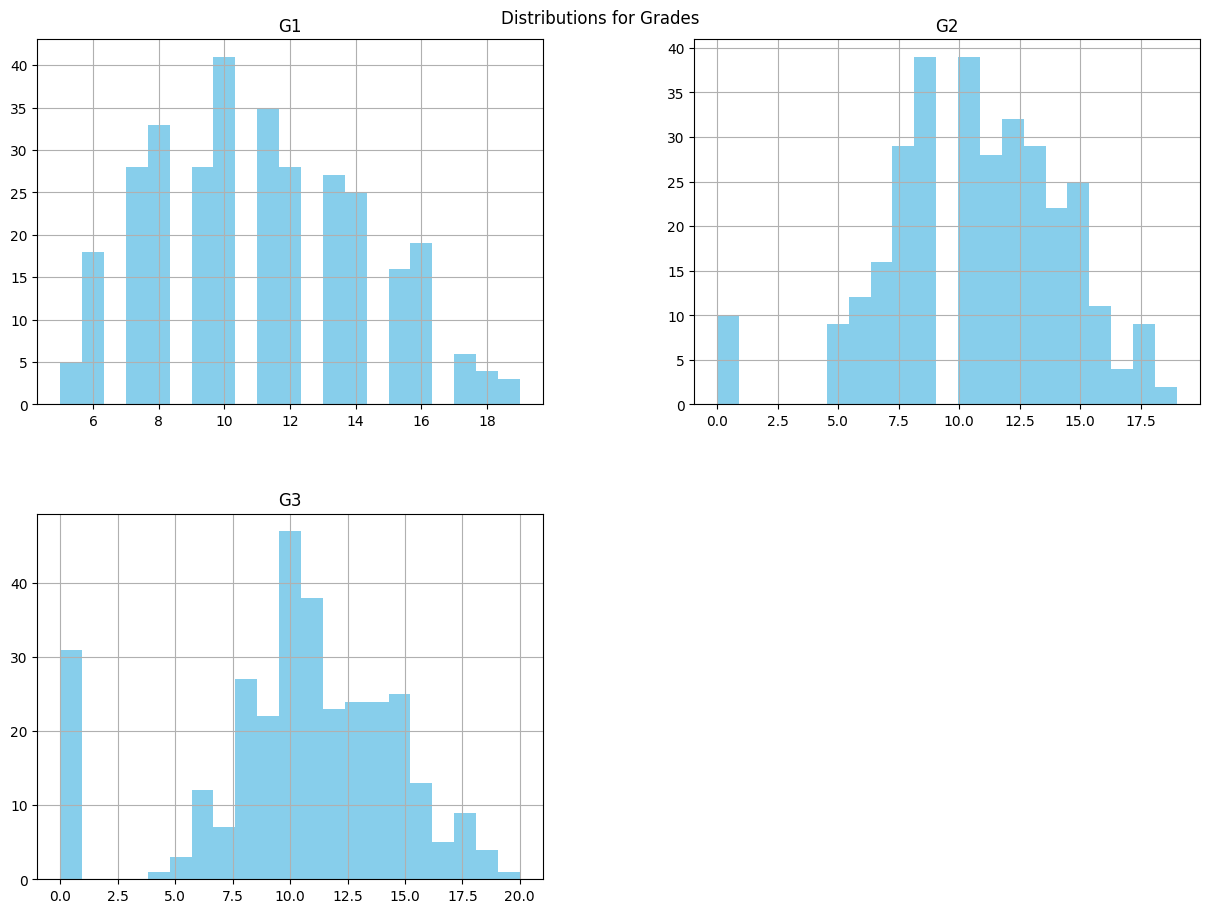

In [33]:
#grades
num[num.columns[-3:]].hist(color = 'skyblue', bins = 21, figsize = (15,10))
plt.xticks(range(0,20))
plt.suptitle("Distributions for Grades")
plt.subplots_adjust(top = 0.95)
plt.savefig('figures/grades_hist.png', bbox_inches = 'tight')

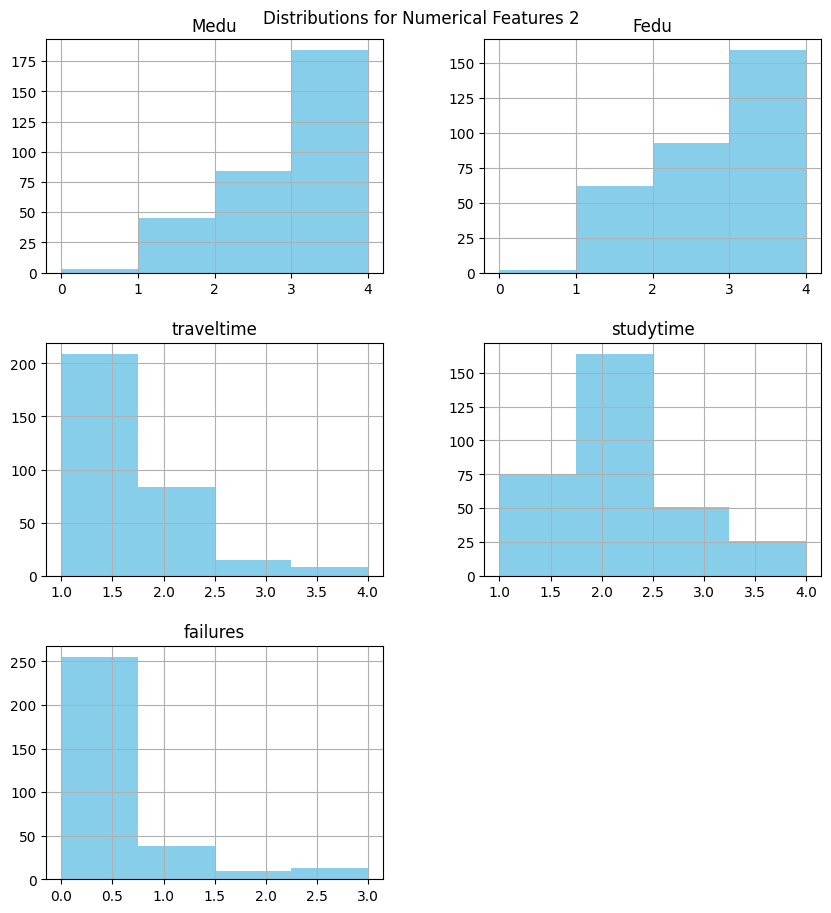

In [37]:
#distributions of numerical features on scale of 1-4
num[num.columns[1:6]].hist(color = 'skyblue', bins = 4, figsize = (10,10))
plt.suptitle("Distributions for Numerical Features 2")
plt.subplots_adjust(top = 0.95)
plt.savefig('figures/num_other_hist.png', bbox_inches = 'tight')

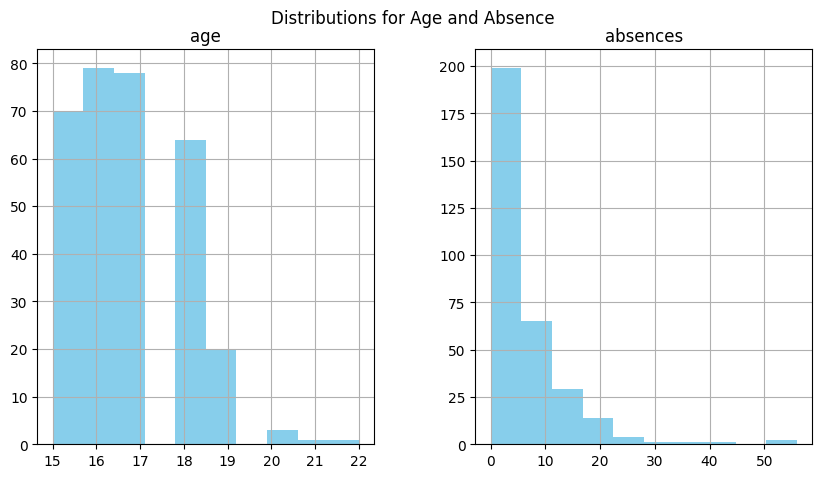

In [50]:
#distributions of age and absences
num[['age', 'absences']].hist(color = 'skyblue', bins = 10, figsize=(10,5))
plt.suptitle("Distributions for Age and Absence")
plt.subplots_adjust(top = 0.9)
plt.savefig('figures/age_abs_hist.png', bbox_inches = 'tight')

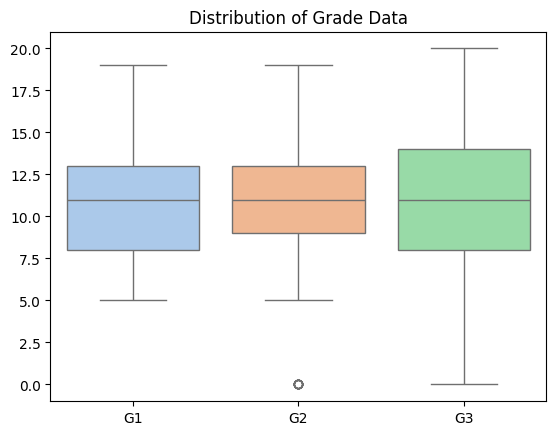

In [31]:
sns.boxplot(data = num[["G1", "G2", "G3"]], palette = 'pastel')
plt.title("Distribution of Grade Data")
plt.savefig("figures/grades_box.png", bbox_inches = 'tight')

In [14]:
#encoding data for MI exploration
data['school'] = [0 if x == "GP" else 1 for x in data['school']]
data['address'] = [0 if x == "U" else 1 for x in data['address']] #encode numerically -- 0 is urben, 1 is rural
data['Pstatus'] = [0 if x == "A" else 1 for x in data['Pstatus']] #0 is apart, 1 is together
data['famsize'] = [0 if x == "LE3" else 1 for x in data['famsize']] #0 is less than 3, 1 is greater than 3 
data['sex'] = [0 if x == "M" else 1 for x in data['sex']] #0 is M, 1 is F
data['Mjob'] = [0 if x == "teacher" else 1 if x == "health" else 2 if x == "services" else 3 if x == "at_home" else 4 for x in data['Mjob']]
data['Fjob'] = [0 if x == "teacher" else 1 if x == "health" else 2 if x == "services" else 3 if x == "at_home" else 4 for x in data['Fjob']]
data['reason'] = [0 if x == "home" else 1 if x == "school" else 2 if x == "course" else 3 for x in data['reason']]
data['guardian'] = [0 if x == "mother" else 1 if x == "father" else 2 for x in data['guardian']]

data.replace({'schoolsup' : {'yes': 1, "no" : 0}, 'famsup' : {'yes': 1, "no" : 0}, 'paid' :  {'yes': 1, "no" : 0}, 'activities' :  {'yes': 1, "no" : 0}, 'nursery':  {'yes': 1, "no" : 0}, 'higher':  {'yes': 1, "no" : 0}, 'internet':  {'yes': 1, "no" : 0}, 'romantic':  {'yes': 1, "no" : 0}}, inplace= True)



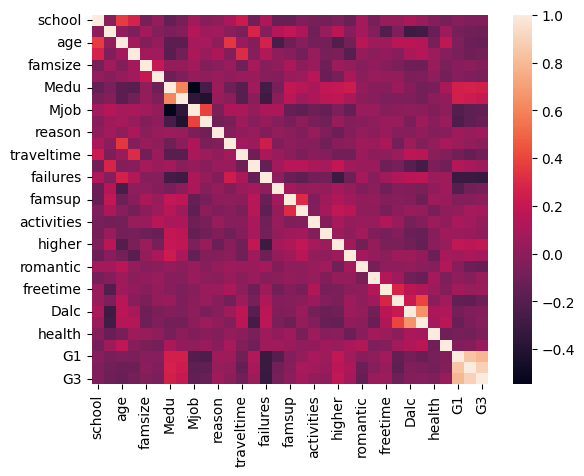

In [23]:
#correlation matrix -- not very helpful with so many nominal features 
corr_matrix = data.corr()
plt.plot(figsize = (20,20))
sns.heatmap(corr_matrix)
plt.savefig('figures/correlation_heatmap.png', bbox_inches = 'tight')

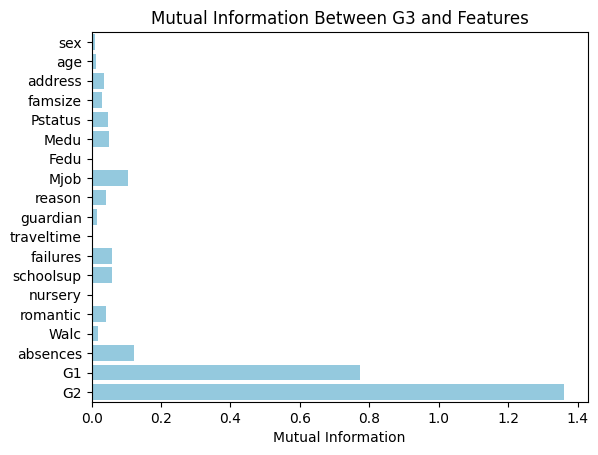

In [18]:
#mutual information-- overall, G1 and G2 have the highest MI scores by a large margin 
''' these features had an MI of 0 (but might have to do with encoding 
sex: 0.0 
age: 0.0 
address: 0.0 
Mjob: 0.0 
Fjob: 0.0 
reason: 0.0 
studytime: 0.0 
famrel: 0.0 
freetime: 0.0 '''
X = data.drop('G3', axis = 1)
X.head()
mi = mutual_info_regression(X, data['G3'])
temp_col = list(X.columns)
temp_mi = list(mi.copy())

mask = [x != 0 for x in temp_mi]
temp_mi = [x for x, m in zip(temp_mi, mask) if m]
temp_col = [x for x, m in zip(temp_col, mask) if m]

sns.barplot(y = temp_col, x= temp_mi, color = 'skyblue')
plt.title("Mutual Information Between G3 and Features")
plt.ylabel('')
plt.xlabel('Mutual Information')
plt.savefig('figures/mutual_info.png', bbox_inches='tight')


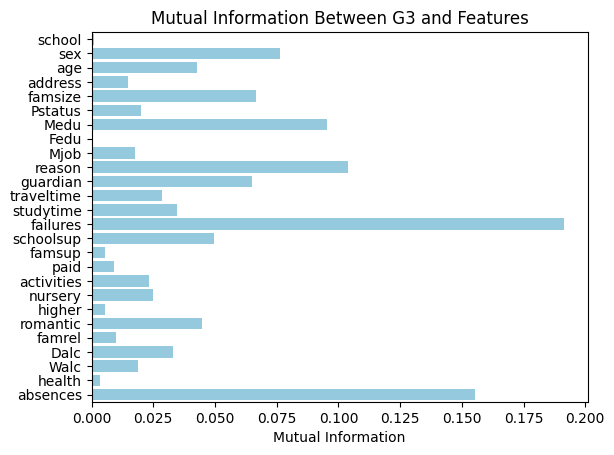

In [17]:
# MI excluding grade data to get higher res visualization
X = data.drop(['G1', 'G2', 'G3'], axis = 1)
X.head()
mi = mutual_info_regression(X, data['G3'])
temp_col = list(X.columns)
temp_mi = list(mi.copy())

mask = [x != 0 for x in temp_mi]
temp_mi = [x for x, m in zip(temp_mi, mask) if m]
temp_col = [x for x, m in zip(temp_col, mask) if m]

sns.barplot(y = temp_col, x= temp_mi, color = 'skyblue')
plt.title("Mutual Information Between G3 and Features")
plt.ylabel('')
plt.xlabel('Mutual Information')
plt.savefig('figures/mutual_info_nogrades.png', bbox_inches='tight')